In [204]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import zipfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Assignment-Hospital Data

### Introduction
The zip file containing the data for this assignment can be downloaded here:

[Hospital Quality Data](https://d396qusza40orc.cloudfront.net/rprog%2Fdata%2FProgAssignment3-data.zip) [832K]

The data for this assignment come from the Hospital Compare web site (http://hospitalcompare.hhs.gov) 
run by the U.S. Department of Health and Human Services. 
The purpose of the web site is to provide data and information about the quality of care at over 4,000 Medicare-certified hospitals 
in the U.S. This dataset es- sentially covers all major U.S. hospitals. 
This dataset is used for a variety of purposes, 
including determining whether hospitals should be fined for not providing high quality care to patients 
(see http://goo.gl/jAXFX for some background on this particular topic).

The Hospital Compare web site contains a lot of data and we will only look at a small subset for this assignment. 
The zip file for this assignment contains three files:
* outcome-of-care-measures.csv: Contains information about 30-day mortality and 
readmission rates for heart attacks, heart failure, and 
pneumonia for over 4,000 hospitals.
* hospital-data.csv: Contains information about each hospital.

* Hospital_Revised_Flatfiles.pdf: Descriptions of the variables in each file (i.e the code book).

A description of the variables in each of the files is in the included PDF file named Hospital_Revised_Flatfiles.pdf. 
This document contains information about many other files that are not included with this programming assignment. 
You will want to focus on the variables for Number 19 (“Outcome of Care Measures.csv”) and Number 11 (“Hospital Data.csv”). 
You may find it useful to print out this document (at least the pages for Tables 19 and 11) to have next to you 
while you work on this assignment. 
In particular, the numbers of the variables for each table indicate column indices in each table 
(i.e. “Hospital Name” is column 2 in the outcome-of-care-measures.csv file).

### Check and Clean data

In [30]:
df = pd.read_csv('outcome-of-care-measures.csv').replace('Not Available',np.nan)
df.head()

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,...,Lower Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Failure,Upper Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Failure,Number of Patients - Hospital 30-Day Readmission Rates from Heart Failure,Footnote - Hospital 30-Day Readmission Rates from Heart Failure,Hospital 30-Day Readmission Rates from Pneumonia,Comparison to U.S. Rate - Hospital 30-Day Readmission Rates from Pneumonia,Lower Readmission Estimate - Hospital 30-Day Readmission Rates from Pneumonia,Upper Readmission Estimate - Hospital 30-Day Readmission Rates from Pneumonia,Number of Patients - Hospital 30-Day Readmission Rates from Pneumonia,Footnote - Hospital 30-Day Readmission Rates from Pneumonia
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,21.3,26.5,891,NaN,17.1,No Different than U.S. National Rate,14.4,20.4,400,NaN
1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,19.2,26.1,264,NaN,17.6,No Different than U.S. National Rate,15.0,20.6,374,NaN
2,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,17.2,22.9,614,NaN,16.9,No Different than U.S. National Rate,14.7,19.5,842,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,22.4,31.9,135,NaN,19.4,No Different than U.S. National Rate,15.9,23.2,254,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,19.9,30.2,59,NaN,18.0,No Different than U.S. National Rate,14.0,22.8,56,NaN


In [205]:
df.shape
df.shape[0]
df.shape[1]

(4706, 46)

4706

46

In [32]:
df.dtypes #全部是object类型, Pandas主要有以下几种dtype：
#object--字符串类型; int--整型; float--浮点数类型; datetime--时间类型; bool--布尔类型

Provider Number                                                                           object
Hospital Name                                                                             object
Address 1                                                                                 object
Address 2                                                                                float64
Address 3                                                                                float64
City                                                                                      object
State                                                                                     object
ZIP Code                                                                                   int64
County Name                                                                               object
Phone Number                                                                               int64
Hospital 30-Day Death (Mortali

In [199]:
df.columns[:15]

Index(['Provider Number', 'Hospital Name', 'Address 1', 'Address 2',
       'Address 3', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number',
       'Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Upper Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Number of Patients - Hospital 30-Day Death (Mortality) Rates from Heart Attack'],
      dtype='object')

In [201]:
# 使用tolist()函数将列名转换为list格式

df.columns.tolist()[:15]

['Provider Number',
 'Hospital Name',
 'Address 1',
 'Address 2',
 'Address 3',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number',
 'Hospital 30-Day Death (Mortality) Rates from Heart Attack',
 'Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
 'Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
 'Upper Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
 'Number of Patients - Hospital 30-Day Death (Mortality) Rates from Heart Attack']

In [33]:
# 更改变量数据类型

index1 = list(df.columns)[10::2]
index2=list(df.columns)[13::6]

for i in index1:
    df.loc[:,i]=df.loc[:,i].astype(float)
    
for i in index2:
    df.loc[:,i]=df.loc[:,i].astype(float)

In [34]:
df.dtypes

Provider Number                                                                           object
Hospital Name                                                                             object
Address 1                                                                                 object
Address 2                                                                                float64
Address 3                                                                                float64
City                                                                                      object
State                                                                                     object
ZIP Code                                                                                   int64
County Name                                                                               object
Phone Number                                                                               int64
Hospital 30-Day Death (Mortali

In [35]:
df.iloc[:,6].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU'], dtype=object)

### Part 1: Plot the 30-day mortality rates for heart attack

plot默认生成是曲线图，你可以通过kind参数生成其他的图形，可选的值为：line, bar, barh, kde, density, scatter。

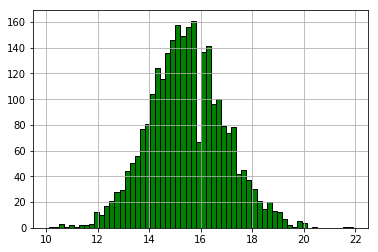

In [36]:
df.iloc[:,10].hist(color='green', bins=60, ec='black')
plt.show()

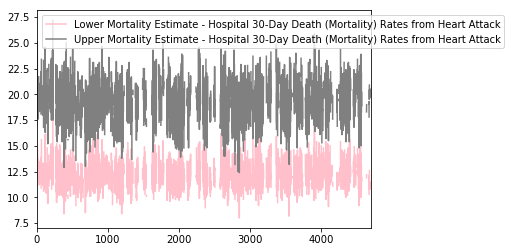

In [556]:
df.iloc[:,[12,13]].plot(color=['pink','gray'])
plt.show()

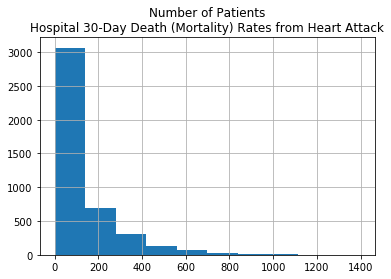

In [562]:
df.iloc[:,14].hist()
plt.title('Number of Patients\nHospital 30-Day Death (Mortality) Rates from Heart Attack')
plt.show()

### Part 2-Finding the best hospital in a state

Write a function called best that take two arguments: the 2-character abbreviated name of a state and an outcome name. The function reads the outcome-of-care-measures.csv file and returns a character vector with the name of the hospital that has the best (i.e. lowest) 30-day mortality for the specified outcome in that state. The hospital name is the name provided in the Hospital.Name variable. The outcomes can be one of “heart attack”, “heart failure”, or “pneumonia”. Hospitals that do not have data on a particular outcome should be excluded from the set of hospitals when deciding the rankings.

Handling ties. If there is a tie for the best hospital for a given outcome, then the hospital names should be sorted in alphabetical order and the first hospital in that set should be chosen (i.e. if hospitals “b”, “c”, and “f” are tied for best, then hospital “b” should be returned).

The function should check the validity of its arguments. If an invalid state value is passed to best, the function should throw an error via the stop function with the exact message “invalid state”. If an invalid outcome value is passed to best, the function should throw an error via the stop function with the exact message “invalid outcome”.

Here is some sample output from the function.
```r
> source("best.R")
> best("TX", "heart attack")
[1] "CYPRESS FAIRBANKS MEDICAL CENTER"
> best("TX", "heart failure")
[1] "FORT DUNCAN MEDICAL CENTER"
> best("MD", "heart attack")
[1] "JOHNS HOPKINS HOSPITAL, THE"
> best("MD", "pneumonia")
[1] "GREATER BALTIMORE MEDICAL CENTER"
```

In [184]:
def best(state, outcome):    
    newstate = df.iloc[:,6].unique()
    newoutcome = ['heart attack','heart failure','pneumonia']
    
    if outcome == 'heart attack':col = 10
    if outcome == 'heart failure': col = 16
    if outcome == 'pneumonia':col = 22  
        
    if state in newstate:
        if outcome in newoutcome:
            newdf = df[df.State == state][[:,[1,col]]]
            idmin = newdf.iloc[:,col].idxmin() # 先清理变量格式，若数据格式有问题，会导致大小排序错误，比如9.7比10.5大
            return(newdf.loc[idmin, 'Hospital Name'])
        else:
            print('invalid outcome')
    else:
        print('invalid state')

In [185]:
best('SC','heart attack')

'MUSC MEDICAL CENTER'

In [186]:
best('XX','heart attack')

invalid state


In [187]:
best('SC','heart attakk')

invalid outcome


In [188]:
best('NY', "pneumonia")

'MAIMONIDES MEDICAL CENTER'

In [189]:
best("TX", "heart attack")

'CYPRESS FAIRBANKS MEDICAL CENTER'

In [190]:
best("TX", "heart failure")

'FORT DUNCAN MEDICAL CENTER'

In [191]:
best("MD", "heart attack")

'JOHNS HOPKINS HOSPITAL, THE'

In [192]:
best("MD", "pneumonia")

'GREATER BALTIMORE MEDICAL CENTER'

### Part 3-Ranking hospitals by outcome in a state

Write a function called rankhospital that takes three arguments: the 2-character abbreviated name of a state (state), an outcome (outcome), and the ranking of a hospital in that state for that outcome (num). The function reads the outcome-of-care-measures.csv file and returns a character vector with the name of the hospital that has the ranking specified by the num argument. For example, the call
```r
> rankhospital("MD", "heart failure", 5)
```
would return a character vector containing the name of the hospital with the 5th lowest 30-day death rate for heart failure. The num argument can take values “best”, “worst”, or an integer indicating the ranking (smaller numbers are better). If the number given by num is larger than the number of hospitals in that state, then the function should return NA. Hospitals that do not have data on a particular outcome should be excluded from the set of hospitals when deciding the rankings.

Handling ties. It may occur that multiple hospitals have the same 30-day mortality rate for a given cause of death. In those cases ties should be broken by using the hospital name. For example, in Texas (“TX”), the hospitals with lowest 30-day mortality rate for heart failure are shown here.
```r
> head(texas)
                         Hospital.Name Rate Rank
3935       FORT DUNCAN MEDICAL CENTER  8.1   1
4085  TOMBALL REGIONAL MEDICAL CENTER  8.5   2
4103 CYPRESS FAIRBANKS MEDICAL CENTER  8.7   3
3954           DETAR HOSPITAL NAVARRO  8.7   4
4010           METHODIST HOSPITAL,THE  8.8   5
3962  MISSION REGIONAL MEDICAL CENTER  8.8   6
```
Note that Cypress Fairbanks Medical Center and Detar Hospital Navarro both have the same 30-day rate (8.7). However, because Cypress comes before Detar alphabetically, Cypress is ranked number 3 in this scheme and Detar is ranked number 4. One can use the order function to sort multiple vectors in this manner (i.e. where one vector is used to break ties in another vector).

The function should check the validity of its arguments. If an invalid state value is passed to rankhospital, the function should throw an error with the exact message “invalid state”. If an invalid outcome value is passed to rankhospital, the function should throw an error via the stop function with the exact message “invalid outcome”.

Here is some sample output from the function.
```r
> source("rankhospital.R")
> rankhospital("TX", "heart failure", 4)
[1] "DETAR HOSPITAL NAVARRO"
> rankhospital("MD", "heart attack", "worst")
[1] "HARFORD MEMORIAL HOSPITAL"
> rankhospital("MN", "heart attack", 5000)
[1] NA
```

In [307]:
sum(df.iloc[:,1].isnull())

0

In [310]:
def rankhospital(state, outcome, number='best'):    
    newstate = df.iloc[:,6].unique()
    newoutcome = ['heart attack','heart failure','pneumonia']

    if outcome == 'heart attack':col = 10
    if outcome == 'heart failure': col = 16
    if outcome == 'pneumonia':col = 22  
    
    if state in newstate:
        if outcome in newoutcome:
            newdf = df[df.State == state][[df.columns[col],'Hospital Name']]
            rankdf = newdf.sort_values([df.columns[col],'Hospital Name']).dropna(axis=0, how='any')
            
            if number=='worst': number=-1
            elif number=='best': number=0
            elif (number < len(rankdf)) and (number>0): number=int(number)-1      
            else: return(np.nan)
            
            return(rankdf.iloc[number, 1])
        else:
            print('invalid outcome')
    else:
        print('invalid state')

In [311]:
rankhospital("MD", "heart attack", "worst") 

# 正确答案是"HARFORD MEMORIAL HOSPITAL",之前一直出错，是因为没有去处Nan值，因为排序的话nan值自动排在最后面

'HARFORD MEMORIAL HOSPITAL'

In [312]:
rankhospital("NC", "heart attack", "worst")

'WAYNE MEMORIAL HOSPITAL'

In [298]:
rankhospital("TX", "heart failure", 4)

'DETAR HOSPITAL NAVARRO'

In [299]:
rankhospital("MN", "heart attack", 5000)

nan

In [313]:
rankhospital("TX", "pneumonia", 10)

'SETON SMITHVILLE REGIONAL HOSPITAL'

In [314]:
rankhospital("NY", "heart attack", 7)

'BELLEVUE HOSPITAL CENTER'

In [315]:
rankhospital("WA", "heart attack", 7)

'YAKIMA VALLEY MEMORIAL HOSPITAL'

In [316]:
rankhospital("XX", "heart attack", 7)

invalid state


### Part 4-Ranking hospitals in all states

Write a function called rankall that takes two arguments: an outcome name (outcome) and a hospital ranking (num). The function reads the outcome-of-care-measures.csv file and returns a 2-column data frame containing the hospital in each state that has the ranking specified in num. For example the function call rankall(“heart attack”, “best”) would return a data frame containing the names of the hospitals that are the best in their respective states for 30-day heart attack death rates. The function should return a value for every state (some may be NA). The first column in the data frame is named hospital, which contains the hospital name, and the second column is named state, which contains the 2-character abbreviation for the state name. Hospitals that do not have data on a particular outcome should be excluded from the set of hospitals when deciding the rankings.

Handling ties. The rankall function should handle ties in the 30-day mortality rates in the same way that the rankhospital function handles ties.

NOTE: For the purpose of this part of the assignment (and for efficiency), your function should NOT call the rankhospital function from the previous section.

The function should check the validity of its arguments. If an invalid outcome value is passed to rankall, the function should throw an error via the stop function with the exact message “invalid outcome”. The num variable can take values “best”, “worst”, or an integer indicating the ranking (smaller numbers are better). If the number given by num is larger than the number of hospitals in that state, then the function should return NA.

Here is some sample output from the function.
```r

> head(rankall("heart attack", 20), 10)
                              hospital state
AK                                <NA>   AK
AL      D W MCMILLAN MEMORIAL HOSPITAL   AL
AR   ARKANSAS METHODIST MEDICAL CENTER   AR
AZ JOHN C LINCOLN DEER VALLEY HOSPITAL   AZ
CA               SHERMAN OAKS HOSPITAL   CA
CO            SKY RIDGE MEDICAL CENTER   CO
CT             MIDSTATE MEDICAL CENTER   CT
DC                                <NA>   DC
DE                                <NA>   DE
FL      SOUTH FLORIDA BAPTIST HOSPITAL   FL
> tail(rankall("pneumonia", "worst"), 3)
                                     hospital state
WI MAYO CLINIC HEALTH SYSTEM - NORTHLAND, INC   WI
WV                     PLATEAU MEDICAL CENTER   WV
WY           NORTH BIG HORN HOSPITAL DISTRICT   WY
> tail(rankall("heart failure"), 10)
                                                            hospital state
TN                         WELLMONT HAWKINS COUNTY MEMORIAL HOSPITAL   TN
TX                                        FORT DUNCAN MEDICAL CENTER   TX
UT VA SALT LAKE CITY HEALTHCARE - GEORGE E. WAHLEN VA MEDICAL CENTER   UT
VA                                          SENTARA POTOMAC HOSPITAL   VA
VI                            GOV JUAN F LUIS HOSPITAL & MEDICAL CTR   VI
VT                                              SPRINGFIELD HOSPITAL   VT
WA                                         HARBORVIEW MEDICAL CENTER   WA
WI                                    AURORA ST LUKES MEDICAL CENTER   WI
WV                                         FAIRMONT GENERAL HOSPITAL   WV
WY                                        CHEYENNE VA MEDICAL CENTER   WY
```

In [475]:
df.iloc[:,6].(unique().tolist().sort)

<function list.sort>

In [539]:
def rankall(outcome, number='best'):    
    newstate = sorted(df.iloc[:,6].unique().tolist())
    newoutcome = ['heart attack','heart failure','pneumonia']
    hospital = [] 
    
    if outcome in newoutcome:        
        for state in newstate: 
            if outcome == 'heart attack':col = 10
            elif outcome == 'heart failure': col = 16
            elif outcome == 'pneumonia':col = 22  
            newdf = df[df.State == state][[df.columns[col],'Hospital Name']]
            rankdf = newdf.sort_values([df.columns[col],'Hospital Name']).dropna() # axis=0,how='any'is the default
            if number=='worst': hospital.append(rankdf.iloc[-1, 1])
            elif number=='best': hospital.append(rankdf.iloc[0, 1])
            elif (number < len(rankdf)) and (number>0): hospital.append(rankdf.iloc[int(number)-1, 1])    
            else: hospital.append('NaN')  
        return(pd.DataFrame({'Hospital': hospital, 'State': newstate}))  
    else:
        print('invalid outcome')  
# 之前试过几次总是出错，原因是在设置number时，会超出rankdf的长度，比如AK，一共有17行数据，但想选每个州的排名为20的医院名，就会返回nan值
# 所以在number的条件判断句中，需要将else语句设为在hospital填充nan值。

In [540]:
rankall("heart attack",20).head(10)

,Hospital,State
0,NaN,AK
1,D W MCMILLAN MEMORIAL HOSPITAL,AL
2,ARKANSAS METHODIST MEDICAL CENTER,AR
3,JOHN C LINCOLN DEER VALLEY HOSPITAL,AZ
4,SHERMAN OAKS HOSPITAL,CA
5,SKY RIDGE MEDICAL CENTER,CO
6,MIDSTATE MEDICAL CENTER,CT
7,NaN,DC
8,NaN,DE
9,SOUTH FLORIDA BAPTIST HOSPITAL,FL


In [541]:
rankall("heart attackkk",10)

invalid outcome


In [542]:
rankall("pneumonia", "worst").tail(5) # 选择worst也是出错，还是忘记去掉nan值，排序之后nan值会排在最后面

,Hospital,State
49,"PORTER HOSPITAL, INC",VT
50,OLYMPIC MEDICAL CENTER,WA
51,"MAYO CLINIC HEALTH SYSTEM - NORTHLAND, INC",WI
52,PLATEAU MEDICAL CENTER,WV
53,NORTH BIG HORN HOSPITAL DISTRICT,WY


In [543]:
rankall("heart failure").tail(10)

,Hospital,State
44,WELLMONT HAWKINS COUNTY MEMORIAL HOSPITAL,TN
45,FORT DUNCAN MEDICAL CENTER,TX
46,VA SALT LAKE CITY HEALTHCARE - GEORGE E. WAHLE...,UT
47,SENTARA POTOMAC HOSPITAL,VA
48,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,VI
49,SPRINGFIELD HOSPITAL,VT
50,HARBORVIEW MEDICAL CENTER,WA
51,AURORA ST LUKES MEDICAL CENTER,WI
52,FAIRMONT GENERAL HOSPITAL,WV
53,CHEYENNE VA MEDICAL CENTER,WY


## Notes

### while-if-break clause

In [195]:
# learn the break function

number=int(input('a number is:'))
while number>0:
    if number==5:
        print('this is 5')
        break
    break

a number is:5
this is 5


### Error:local variable 'val' referenced before assignment

In [553]:
val=9
def test(flag):  
    if flag:  
        val = 1  
    else:  
        print('OOOOps~')  
    return val 

test(0)


OOOOps~


UnboundLocalError: local variable 'val' referenced before assignment

In [555]:
# 解决方法：用global关键字来进行说明该变量是全局变量
val=9
def test(flag):
    global val
    if flag: 
        val = 1 
    else: 
        print('Bingo~~~~') 
    return val

test(0)

Bingo~~~~


9

In [563]:
df1 = pd.DataFrame([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]], columns=["col1", "col2", "col3", "col4"])
df1

,col1,col2,col3,col4
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3


In [565]:
df1.mean(axis=1)

0    1.0
1    2.0
2    3.0
dtype: float64

In [566]:
df1.drop('col4', axis=1)

#df1.drop('col4', axis=0) gives the error

,col1,col2,col3
0,1,1,1
1,2,2,2
2,3,3,3
